<a href="https://colab.research.google.com/github/maktaurus/ML-Work/blob/main/Classic_Algorithams/KNN_algo_SKLEARN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The K-Nearest Neighbors (KNN) algorithm is a popular supervised learning technique.

### Common applications:
Image classification: KNN is used in image classification tasks, such as handwritten digit recognition.
Text classification: KNN is applied to text classification tasks, like spam detection.
Recommendation systems: KNN is used in recommendation systems to suggest products based on user behavior.


With Dummy Datasets (synthetic)

In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from mlxtend.plotting import plot_decision_regions

In [ ]:
features,labels = make_blobs(1000,centers=[(-3,3),(0,0),(2,2)],random_state=365)

In [ ]:
features.shape,labels.shape

((1000, 2), (1000,))

In [ ]:
np.unique(labels)

array([0, 1, 2])

<Axes: >

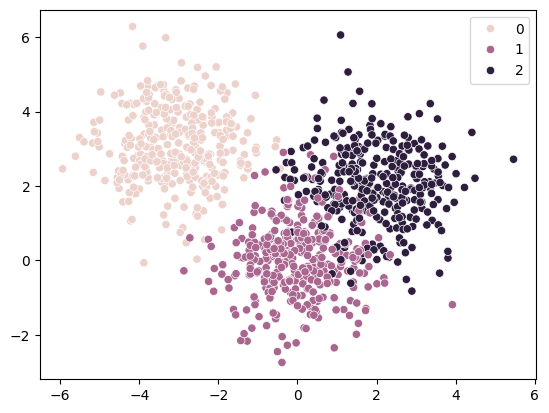

In [ ]:
sns.scatterplot(x=features[:,0],y=features[:,1],hue=labels)

In [ ]:
f1 = -3
f2 = 1

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features,labels,
                                                    test_size=0.2,
                                                    stratify=labels,
                                                    random_state=365)

In [ ]:
x_train.shape,y_train.shape

((800, 2), (800,))


**Create model for classification task**

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)

**Create parameter list for GridSearch**

In [ ]:
parameters = {'n_neighbors':range(1,51),
              "weights":["uniform","distance"]}

In [ ]:
grid_search = GridSearchCV(clf,
                           parameters,
                           scoring="accuracy")

**Fit the grid search model**

In [ ]:
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

**Create a instance of grid search model with best estimator**

In [ ]:
clf = grid_search.best_estimator_
clf

KNeighborsClassifier(n_neighbors=10)

In [ ]:
clf.score(x_test,y_test)

0.965

**Creat a dummy data points for prediction**

In [ ]:
fe1 = -1.3
fe2 = 2

In [ ]:
grid_search.predict([[fe1,fe2]])

array([0])

**Print out the classification report and confusion matrix**

In [ ]:
print(classification_report(y_test,grid_search.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      0.93      0.95        67
           2       0.93      0.98      0.96        66

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



<Axes: >

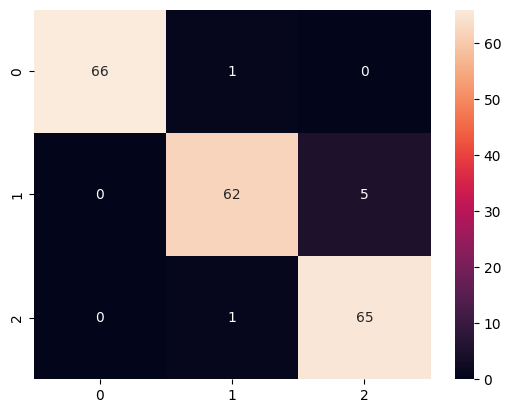

In [ ]:
sns.heatmap(confusion_matrix(y_test,grid_search.predict(x_test)),annot=True,fmt='d')

In [ ]:
neighbors = clf.kneighbors(np.array([[fe1,fe2]]),return_distance=True)
neighbors

(array([[0.22725429, 0.3559081 , 0.46181799, 0.55561102, 0.5760743 ,
         0.57900006, 0.58548377, 0.61241638, 0.63004215, 0.63883789]]),
 array([[786, 123,  17, 143, 299, 588,  65, 399, 515, 388]]))

Plot the neighbors

<Axes: >

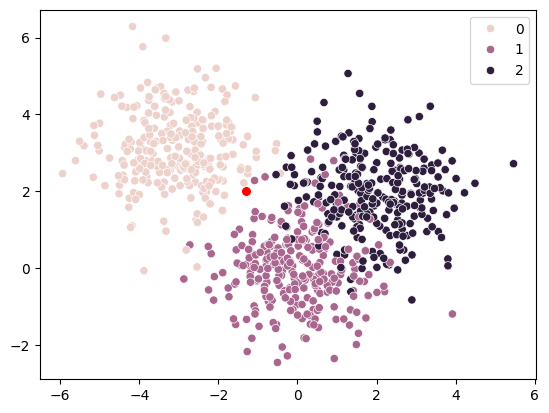

In [ ]:

sns.scatterplot(x=x_train[:,0],y=x_train[:,1],hue=y_train)
sns.scatterplot(x=[fe1],y=[fe2],color='red',markers=["o"],s=50)

**Plot the decision region with function plot_decision_regions. **

<Axes: >

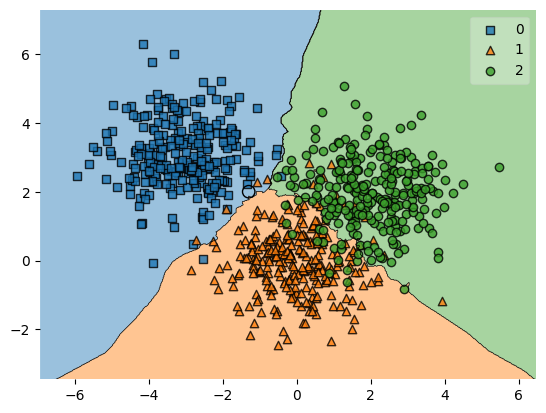

In [ ]:
plot_decision_regions(x_train,y_train,
                      clf,
                      X_highlight=np.array([[fe1,fe2]]))

# KNN for Regression task

In [2]:
pip install -q pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import yfinance as yf
import pandas_ta as ta

In [4]:
data = yf.download("^NSEI",period="max",interval="1wk")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4855.700195,4481.549805,4837.549805,4837.549805,0
2007-09-24,4837.149902,5055.799805,4837.149902,5021.350098,5021.350098,0
2007-10-01,5021.500000,5261.350098,5001.350098,5185.850098,5185.850098,0
2007-10-08,5186.250000,5549.299805,5000.950195,5428.250000,5428.250000,0
2007-10-15,5428.350098,5736.799805,5101.750000,5215.299805,5215.299805,0


In [5]:
data.drop(["Adj Close","Volume"],axis=1,inplace=True)

In [6]:
data.ta.sma(5,append=True)
data.ta.sma(10,append=True)
data.ta.sma(15,append=True)
data.ta.sma(20,append=True)
data.ta.sma(30,append=True)
data.ta.sma(50,append=True)
data.ta.sma(100,append=True)
data.ta.macd(append=True)
data.ta.rsi(append=True)
data.ta.bbands(append=True)
data.ta.stoch(append=True)
data.ta.willr(append=True)
data.ta.ao(append=True)
data.ta.aroon(append=True)

,AROOND_14,AROONU_14,AROONOSC_14
Date,,,
2007-09-17,NaN,NaN,NaN
2007-09-24,NaN,NaN,NaN
2007-10-01,NaN,NaN,NaN
2007-10-08,NaN,NaN,NaN
2007-10-15,NaN,NaN,NaN
...,...,...,...
2024-08-26,14.285714,100.0,85.714286
2024-09-02,7.142857,100.0,92.857143
2024-09-09,0.000000,100.0,100.000000


In [7]:
data["Targethigh"] = data["High"].shift(-1)
data["Targetnlow"] = data["Low"].shift(-1)
data["Targetnclose"] = data["Close"].shift(-1)

In [8]:
data.reset_index(drop=True,inplace=True)

In [12]:
test = data.tail(10)
data.drop(test.index,inplace=True)
data.dropna(inplace=True)

In [13]:
x = data.iloc[:,:-3]
y = data.iloc[:,-3:]

In [19]:
clf = KNeighborsRegressor(n_neighbors=1)

In [20]:
clf.fit(x,y)

KNeighborsRegressor(n_neighbors=1)

In [21]:
test_x = test.iloc[:,:-3]
test_y = test.iloc[:,-3:]

In [23]:
test_y

,Targethigh,Targetnlow,Targetnclose
879,25078.300781,24686.849609,24717.699219
880,24419.750000,23893.699219,24367.500000
881,24563.900391,24099.699219,24541.150391
882,24867.349609,24522.949219,24823.150391
883,25268.349609,24874.699219,25235.900391
884,25333.650391,24801.300781,24852.150391
885,25433.349609,24753.150391,25356.500000
886,25849.250000,25285.550781,25790.949219
887,26277.349609,25847.349609,26178.949219
888,NaN,NaN,NaN


Prediction are not so great due to fact these data points are never seen in training dataset. Even with change in number of neighbors in clf.

In [22]:
clf.predict(test_x)

array([[24861.15039062, 24074.19921875, 24834.84960938],
       [24861.15039062, 24074.19921875, 24834.84960938],
       [24861.15039062, 24074.19921875, 24834.84960938],
       [24861.15039062, 24074.19921875, 24834.84960938],
       [24861.15039062, 24074.19921875, 24834.84960938],
       [24861.15039062, 24074.19921875, 24834.84960938],
       [24861.15039062, 24074.19921875, 24834.84960938],
       [24861.15039062, 24074.19921875, 24834.84960938],
       [24861.15039062, 24074.19921875, 24834.84960938],
       [24861.15039062, 24074.19921875, 24834.84960938]])

In [18]:
mean_squared_error(test_y.dropna(),clf.predict(test_x.iloc[:-1,:]))

4468012.539208102